### Sistema de recomendação de músicas - kmeans - Spotify API

Com métodos de Machine Learning, poderemos construir nosso próprio recomendador, para analisar os dados do Spotify. Com ele, podemos pegar os critérios e as características das nossas músicas e entender como elas estão divididas, como elas estão correlacionadas. Quem nunca pensou em como aquelas músicas que escutamos no aleatório em algum aplicativo de música, parecem que não estão tão aleatórias assim? E nem é só com aplicativos de música, aplicativos de streaming, ou qualquer outro aplicativo de vídeo. A ideia deste projeto é aplicar um algorítmo de machine learning para nos ajudar a encontrar esses padrões e semelhanças entre as músicas e fazer recomendações baseados nestas.  

Bases utilizadas:   
[Dados gerais](https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/Dados_totais.csv)  
[Dados por gênero](https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/data_by_genres.csv)  
[Dados por ano](https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/data_by_year.csv)  

As bases de dados foram retiradas através da API do Spotify e já foram previamente tratadas (pelo disponibilizador das bases dados).

### Analisando os dados

In [1]:
import pandas as pd 
import numpy as np

In [55]:
dados = pd.read_csv('https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/Dados_totais.csv')
dados_generos = pd.read_csv('https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/data_by_genres.csv')
dados_anos = pd.read_csv('https://raw.githubusercontent.com/sthemonica/music-clustering/main/Dados/data_by_year.csv')

In [3]:
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

   explicit                      id  instrumentalness  key  liveness  \
0         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   

   loudness  mode         name  popularity  speechiness    tempo  \
0    -7.227     1       Yellow          84       0.0281  173.372   
1    -5.946     0  Ms. Jackson          80       0.2690   94.948   

            artists_song  
0      Coldplay - Yellow  
1  OutKast - Ms. Jackson

In [4]:
dados.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [5]:
dados.shape

(20311, 19)

Removeremos as colunas quem não traz uma relação direta entre as músicas.

In [6]:
dados = dados.drop(['explicit', 'key', 'mode'], axis=1)
dados.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3   0.865  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4   0.661  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

                  name  popularity  speechiness    tempo  \
0               Yellow          84       0.0281  173.372   
1          Ms. Jackson          80       0.2690   94.948   
2           In the End          84       0.0584  105.143   
3           Kryptonite          78       0.0286   99.009   
4  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

In [7]:
dados.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [8]:
dados.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [9]:
dados_generos.head(2)

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834    0.3616 -31.514333     0.040567   75.336500   
1  0.450678          0.477762    0.1310 -16.854000     0.076817  120.285667   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5

In [10]:
dados_generos = dados_generos.drop(['key', 'mode'], axis = 1)
dados_generos.head(2)

genres  acousticness  danceability   duration_ms    energy  \
0  21st century classical      0.979333      0.162883  1.602977e+05  0.071317   
1                   432hz      0.494780      0.299333  1.048887e+06  0.450678   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.606834    0.3616 -31.514333     0.040567   75.336500  0.103783   
1          0.477762    0.1310 -16.854000     0.076817  120.285667  0.221750   

   popularity  
0   27.833333  
1   52.500000

In [11]:
dados_generos.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [12]:
dados_generos.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [13]:
dados_anos.head()

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   
2     1  1923      0.957247      0.577341  177942.362162  0.262406   
3     1  1924      0.940200      0.549894  191046.707627  0.344347   
4     1  1925      0.962607      0.573863  184986.924460  0.278594   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878  0.205710 -17.048667     0.073662  101.531493  0.379327   
1          0.434195  0.240720 -19.275282     0.116655  100.884521  0.535549   
2          0.371733  0.227462 -14.129211     0.093949  114.010730  0.625492   
3          0.581701  0.235219 -14.231343     0.092089  120.689572  0.663725   
4          0.418297  0.237668 -14.146414     0.111918  115.521921  0.621929   

   popularity  key  
0    0.653333    2  
1    0.140845   10  
2    5.389189    0  
3    0.661017   10  
4    2.604317    5

In [14]:
dados_anos.year.unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020], dtype=int64)

Podemos perceber esta base de dados possue um range de anos bem maior que a de Dados totais. É interessate nós trabalharmos com ranges de anos iguais para consegui fazer um melhor cruzamento de informações, por isso:

In [15]:
dados_anos = dados_anos[dados_anos['year'] >= 2000]
dados_anos['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [16]:
dados_anos = dados_anos.drop(['key', 'mode'], axis = 1)
dados_anos.head(2)

year  acousticness  danceability    duration_ms    energy  \
79  2000      0.289323      0.590918  242724.642638  0.625413   
80  2001      0.286842      0.583318  240307.796010  0.626986   

    instrumentalness  liveness  loudness  speechiness       tempo   valence  \
79          0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
80          0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   

    popularity  
79   46.684049  
80   48.750125

In [17]:
dados_anos = dados_anos.reset_index()
dados_anos.head(2)

index  year  acousticness  danceability    duration_ms    energy  \
0     79  2000      0.289323      0.590918  242724.642638  0.625413   
1     80  2001      0.286842      0.583318  240307.796010  0.626986   

   instrumentalness  liveness  loudness  speechiness       tempo   valence  \
0          0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
1          0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   

   popularity  
0   46.684049  
1   48.750125

### Análise gráfica

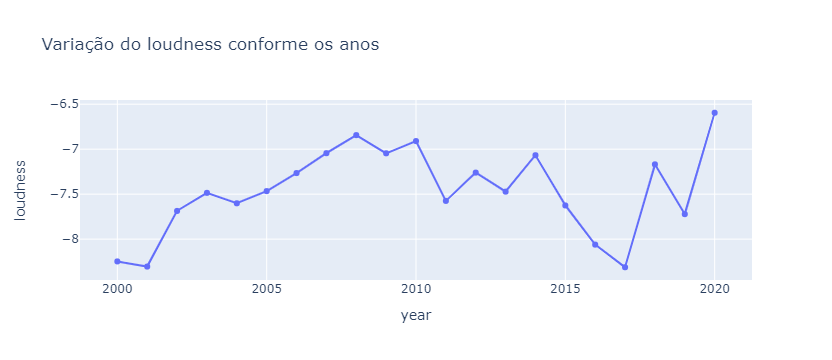

In [18]:
import plotly.express as px


fig = px.line(dados_anos, x = 'year', y = 'loudness', markers = True, title = 'Variação do loudness conforme os anos')
fig.show()

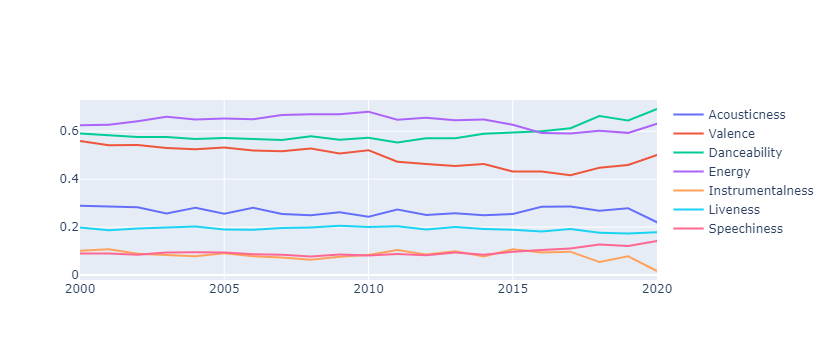

In [19]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['speechiness'],
                    name='Speechiness'))
fig.show()

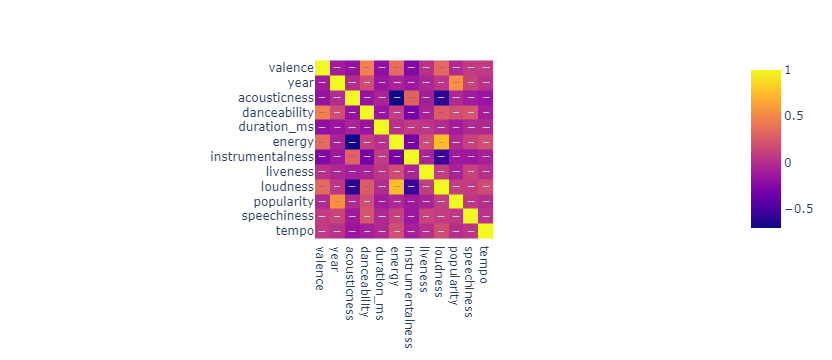

In [20]:
fig = px.imshow(dados.corr(), text_auto=True)
fig.show()     

### Clusterização por gênero

In [21]:
dados_generos['genres'].value_counts().sum()

2973

Podemos perceber que cada linha é um tipo de gênero, então, não faz tanto sentido termos essa coluna. Precisamos fazer um dummie nessa coluna ou exclui-la, são essas duas possibilidades que temos, já que quando formos fazer uma cluster, por exemplo, não conseguimos lidar com dados que não são numéricos.

In [22]:
dados_generos1 = dados_generos.drop('genres', axis=1)
dados_generos1

acousticness  danceability   duration_ms    energy  instrumentalness  \
0         0.979333      0.162883  1.602977e+05  0.071317          0.606834   
1         0.494780      0.299333  1.048887e+06  0.450678          0.477762   
2         0.762000      0.712000  1.151770e+05  0.818000          0.876000   
3         0.651417      0.529093  2.328809e+05  0.419146          0.205309   
4         0.676557      0.538961  1.906285e+05  0.316434          0.003003   
...            ...           ...           ...       ...               ...   
2968      0.222625      0.547082  2.580991e+05  0.610240          0.143872   
2969      0.161000      0.863000  2.063200e+05  0.909000          0.000000   
2970      0.263261      0.748889  3.060728e+05  0.622444          0.257227   
2971      0.993000      0.705667  1.984173e+05  0.172667          0.468633   
2972      0.421038      0.629409  1.716717e+05  0.609369          0.019248   

      liveness   loudness  speechiness       tempo   valence  popularity  
0     0.361600 -31.514333     0.040567   75.336500  0.103783   27.833333  
1     0.131000 -16.854000     0.076817  120.285667  0.221750   52.500000  
2     0.126000  -9.180000     0.047000  133.444000  0.975000   48.000000  
3     0.218696 -12.288965     0.107872  112.857352  0.513604   20.859882  
4     0.172254 -12.479387     0.082851  112.110362  0.448249   45.820071  
...        ...        ...          ...         ...       ...         ...  
2968  0.204206 -11.295878     0.061088  125.494919  0.596155   33.778943  
2969  0.108000  -5.985000     0.081300  119.038000  0.845000   58.000000  
2970  0.089678 -10.289222     0.038778  101.965222  0.824111   46.666667  
2971  0.179667 -11.453333     0.348667   91.278000  0.739000    0.000000  
2972  0.255877  -9.854825     0.050491  126.366087  0.808544   30.261905  

[2973 rows x 11 columns]

### Preparando o modelo

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Precisamos padronizar as escalar entre as variáveis e pelo fato da nossa base de dados ter uma dimensão muito grande também precisamos diminui-la. Faremos isso com o StandardScaler e o PCA, repectivamente.

In [24]:
SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])

In [25]:
genre_embedding_pca = pca_pipeline.fit_transform(dados_generos1)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)

In [26]:
projection

x         y
0     5.910268 -0.011146
1     2.787093  4.498483
2    -0.757538 -1.258495
3     1.020521 -0.931690
4     0.753911 -0.999861
...        ...       ...
2968 -0.475136 -0.017126
2969 -3.026756 -1.304983
2970 -0.832511 -1.089726
2971  1.774790 -3.695233
2972 -1.028069 -1.390709

[2973 rows x 2 columns]

### Aplicando o modelo - K-Means

In [27]:
from sklearn.cluster import KMeans

In [28]:
kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)

kmeans_pca.fit(projection)

dados_generos['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

Initialization complete
Iteration 0, inertia 4523.567815543697
Iteration 1, inertia 3668.985552156029
Iteration 2, inertia 3624.7309257118213
Iteration 3, inertia 3602.4958137588183
Iteration 4, inertia 3588.060791240493
Iteration 5, inertia 3575.4395702593097
Iteration 6, inertia 3566.3761311630224
Iteration 7, inertia 3562.5917284574975
Iteration 8, inertia 3560.3144677009377
Iteration 9, inertia 3558.8854951526555
Iteration 10, inertia 3558.0027489340546
Iteration 11, inertia 3557.7295547754948
Converged at iteration 11: center shift 9.31998104486528e-05 within tolerance 0.0002709886847099652.
Initialization complete
Iteration 0, inertia 3650.516684764657
Iteration 1, inertia 3552.891536564819
Iteration 2, inertia 3528.942542123226
Iteration 3, inertia 3518.849132048715
Iteration 4, inertia 3512.67179161398
Iteration 5, inertia 3509.174107824746
Iteration 6, inertia 3506.3883335513783
Iteration 7, inertia 3505.091074309412
Iteration 8, inertia 3504.646511738497
Converged at iteratio

In [29]:
projection['generos'] = dados_generos['genres']
projection.head(5)

x         y  cluster_pca                 generos
0  5.910268 -0.011146            3  21st century classical
1  2.787093  4.498483            3                   432hz
2 -0.757538 -1.258495            4                   8-bit
3  1.020521 -0.931690            1                      []
4  0.753911 -0.999861            1              a cappella

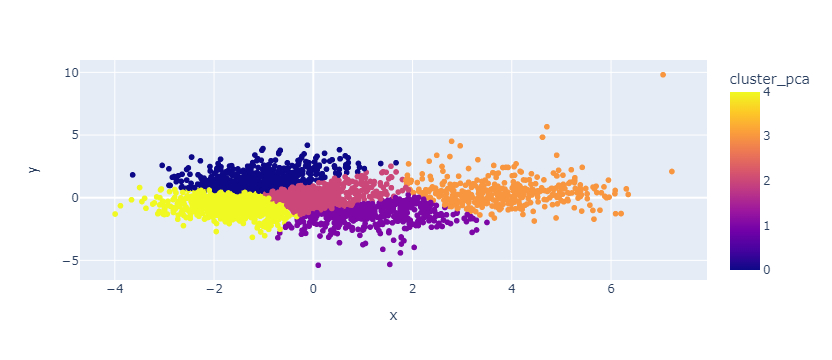

In [30]:
fig = px.scatter(
   projection, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'generos'])
fig.show()

Só que como eu vou saber se essa cluster foi separada de uma forma correta, se essa cluster está certa realmente, se ela está errada, se eu tive um taxa de aprendizado boa, ou não, porque ele pode simplesmente ter separado de uma forma totalmente aleatória, e ficou bonito assim. Então, uma forma de avaliarmos se a cluster foi bem separada ou não, é utilizarmos um explained variance do PCA, para vermos o quanto nossas variáveis estão sendo explicadas dentro dessa nossa cluster.

In [31]:
# o quanto nossas variáveis estão sendo explicadas dentro dessa nossa cluster, em cada coluna  
pca_pipeline[1].explained_variance_ratio_.sum()

0.4927066994726645

In [32]:
# Vemos quantas variáveis estão sendo explicadas por cada coluna. Aqui duas colunas estão conseguindo explicar 11.  
pca_pipeline[1].explained_variance_.sum()

5.421597305805701

### Clusterização por música

In [33]:
dados['artists'].value_counts()

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [34]:
dados['artists_song'].value_counts()

Coldplay - Yellow                                                   1
Juice WRLD - Intro                                                  1
Carrie Underwood - The Champion - Bonus Track                       1
YoungBoy Never Broke Again - Cross Me (feat. Lil Baby and Plies)    1
Twenty One Pilots - Morph                                           1
                                                                   ..
Taylor Swift - Come Back...Be Here                                  1
Banda El Recodo - Me Gusta Todo De Ti                               1
Michael Bublé - The Christmas Song                                  1
Glee Cast - Smooth Criminal (Glee Cast Version) (feat. 2CELLOS)     1
Eminem - Darkness                                                   1
Name: artists_song, Length: 20311, dtype: int64

Aqui vamos transformar a variável categórica "artist" em variável numérica.

In [35]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()
dados2 = dados.drop('artists', axis=1)

dados_musicas_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))], axis=1)
dados_musicas_dummies

valence  year  acousticness  danceability  duration_ms  energy  \
0        0.285  2000       0.00239         0.429       266773   0.661   
1        0.613  2000       0.14300         0.843       270507   0.806   
2        0.400  2000       0.00958         0.556       216880   0.864   
3        0.543  2000       0.00664         0.545       233933   0.865   
4        0.760  2000       0.03020         0.949       284200   0.661   
...        ...   ...           ...           ...          ...     ...   
20306    0.187  2020       0.57400         0.445       176250   0.330   
20307    0.240  2020       0.81500         0.467       179188   0.429   
20308    0.466  2020       0.31000         0.562       253613   0.686   
20309    0.522  2020       0.20400         0.598       230600   0.472   
20310    0.195  2020       0.00998         0.671       337147   0.623   

                           id  instrumentalness  liveness  loudness  ...  \
0      3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227  ...   
1      0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  ...   
2      60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870  ...   
3      6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708  ...   
4      3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244  ...   
...                       ...               ...       ...       ...  ...   
20306  0PUkanqCGTb6qseXPKOw1F          0.000000    0.1020    -8.121  ...   
20307  6Iw6fQVKZi0fWtEQBrTFcP          0.000052    0.1770    -8.689  ...   
20308  308prODCCD0O660tIktbUi          0.022500    0.1250    -8.480  ...   
20309  2f8y4CuG57UJEmkG3ujd0D          0.000015    0.1080   -10.991  ...   
20310  5SiZJoLXp3WOl3J4C8IK0d          0.000008    0.6430    -7.161  ...   

      artists_Zara Larsson  artists_Zedd  artists_alt-J  artists_blackbear  \
0                        0             0              0                  0   
1                        0             0              0                  0   
2                        0             0              0                  0   
3                        0             0              0                  0   
4                        0             0              0                  0   
...                    ...           ...            ...                ...   
20306                    0             0              0                  0   
20307                    0             0              0                  0   
20308                    0             0              0                  0   
20309                    0             0              0                  0   
20310                    0             0              0                  0   

      artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                     0                 0                           0   
1                     0                 0                           0   
2                     0                 0                           0   
3                     0                 0                           0   
4                     0                 0                           0   
...                 ...               ...                         ...   
20306                 0                 0                           0   
20307                 0                 0                           0   
20308                 0                 0                           0   
20309                 0                 0                           0   
20310                 0                 0                           0   

       artists_fun.  artists_girl in red  artists_iann dior  
0                 0                    0                  0  
1                 0                    0                  0  
2                 0                    0                  0  
3                 0                    0                  0  
4                 0                    0                  0  
...             ...            

In [36]:
dados.shape

(20311, 16)

In [37]:
dados_musicas_dummies.shape

(20311, 890)

In [38]:
# aqui queremos uma taxa de aprendizado de 70%
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))])


music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['id','name','artists_song'], axis=1))
# já que eu n sei quantas colunas terei, n precisarei passar aqui 
projection_m = pd.DataFrame(data=music_embedding_pca)

In [39]:
pca_pipeline[1].n_components_

612

In [40]:
kmeans_pca_pipeline = KMeans(n_clusters=50, verbose=False, random_state=SEED)

kmeans_pca_pipeline.fit(projection_m)

dados['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)

In [41]:
projection_m['artist'] = dados['artists']
projection_m['song'] = dados['artists_song']

In [42]:
projection_m.head()

0         1         2         3         4         5         6  \
0  0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1 -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2 -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3 -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4 -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   

          7         8         9  ...       605       606       607       608  \
0 -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027 -0.032617   
1  0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322 -0.030234   
2  1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979 -0.012781   
3  1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148 -0.040911   
4  0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478 -0.010033   

            609           610           611  cluster_pca        artist  \
0  8.274467e-13  4.499766e-12  2.343081e-13           33      Coldplay   
1  3.745543e-12  5.298607e-12  1.600246e-13           33       OutKast   
2 -7.955180e-13  1.164739e-12  2.085599e-13           33   Linkin Park   
3  3.504870e-13  1.999977e-11  3.703480e-12           33  3 Doors Down   
4  1.978431e-12  2.207771e-12 -2.535792e-13           37        Eminem   

                           song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady  

[5 rows x 615 columns]

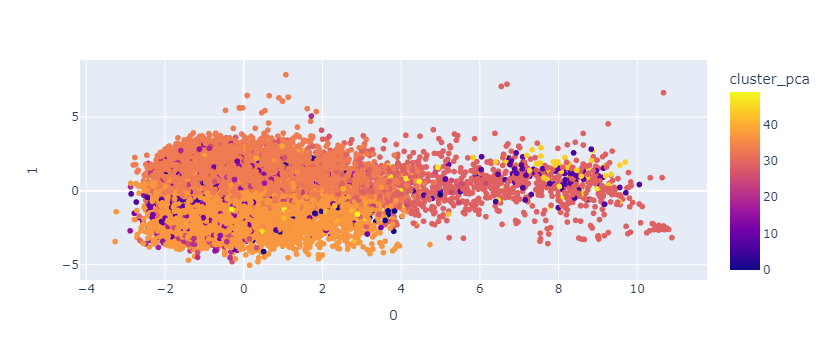

In [43]:
# O x = 0 e y = 1 porque são as colunas que melhor explicam o dataset que vai de 0 a 615 colunas. 
fig = px.scatter(
   projection_m, x=0, y=1, color='cluster_pca', hover_data=[0, 1, 'song'])
fig.show()

In [48]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.7000008463187029

In [45]:
pca_pipeline[1].explained_variance_.sum()

620.931321868869

### Sistema de recomendação

In [49]:
nome_musica = 'Ed Sheeran - Shape of You'

In [ ]:
projection_m

0         1         2         3         4         5         6  \
0      0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1     -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2     -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3     -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4     -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   
...         ...       ...       ...       ...       ...       ...       ...   
20306  1.346699 -2.775889  0.986755 -1.704967  0.103935 -0.726582  0.253808   
20307  1.269387 -2.444619  0.971408 -0.115303 -0.719597 -1.823579 -0.545186   
20308  0.781916 -1.164865  0.705256 -0.947160  1.145828 -0.472667 -0.356604   
20309  0.002454 -3.056407 -0.272934  1.436355 -0.604453  0.251492 -1.361710   
20310 -0.957008 -1.208016  1.103144  4.128170  1.026126  0.085505  1.588383   

              7         8         9  ...       605       606       607  \
0     -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027   
1      0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322   
2      1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979   
3      1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148   
4      0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478   
...         ...       ...       ...  ...       ...       ...       ...   
20306  0.520234 -0.064513  0.204971  ... -0.235355 -0.054256  0.016922   
20307 -1.475719 -0.338390  0.272129  ... -0.183026  0.074605  0.005622   
20308  0.972512  0.900317 -0.674016  ... -0.033420 -0.157564  0.213849   
20309 -0.633245  0.280076  0.521145  ... -0.784640  0.080684  0.038379   
20310  0.567041 -1.026283  0.266124  ... -0.012069 -0.003818 -0.017675   

            608           609           610           611  cluster_pca  \
0     -0.032617  8.274467e-13  4.499766e-12  2.343081e-13           33   
1     -0.030234  3.745543e-12  5.298607e-12  1.600246e-13           33   
2     -0.012781 -7.955180e-13  1.164739e-12  2.085599e-13           33   
3     -0.040911  3.504870e-13  1.999977e-11  3.703480e-12           33   
4     -0.010033  1.978431e-12  2.207771e-12 -2.535792e-13           37   
...         ...           ...           ...           ...          ...   
20306 -0.125947  4.843292e-11 -4.768332e-12  1.870995e-12           37   
20307  0.000054  2.148580e-11 -5.322593e-12 -1.776040e-12           37   
20308 -0.065180  1.071122e-11 -2.034552e-11 -7.406324e-12           37   
20309  0.108493  4.856898e-11  2.194949e-11 -9.132014e-12           37   
20310 -0.010372  1.967303e-12  2.226667e-12 -2.558319e-13           37   

              artist                                song  
0           Coldplay                   Coldplay - Yellow  
1            OutKast               OutKast - Ms. Jackson  
2        Linkin Park            Linkin Park - In the End  
3       3 Doors Down           3 Doors Down - Kryptonite  
4             Eminem        Eminem - The Real Slim Shady  
...              ...                                 ...  
20306          Bazzi      Bazzi - I Don't Think I'm Okay  
20307  Bryson Tiller  Bryson Tiller - Timeless Interlude  
20308    Fleet Foxes              Fleet Foxes - Sunblind  
20309          Gunna      Gunna - NASTY GIRL / ON CAMERA  
20310         Eminem                   Eminem - Darkness  

[20311 rows x 615 columns]

In [54]:
from pandas.core.dtypes.cast import maybe_upcast
from sklearn.metrics.pairwise import euclidean_distances

cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]
musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]
x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]

#distâncias euclidianas
distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias']= distancias
recomendada = musicas_recomendadas.sort_values('distancias').head(10)
recomendada

0         1                                               song  \
2463  -0.826954 -2.939691                          Ed Sheeran - Shape of You   
2826  -0.831891 -2.941406                       Juice WRLD - Hear Me Calling   
13421 -0.826575 -2.915302                    $uicideBoy$ - For the Last Time   
2942  -0.863727 -2.965997                 Marshmello - Be Kind (with Halsey)   
5371  -0.874338 -2.927113            The Kid LAROI - WRONG (feat. Lil Mosey)   
13682 -0.878031 -2.944654    YoungBoy Never Broke Again - House Arrest Tingz   
15392 -0.792012 -2.987829                         $uicideBoy$ - Putrid Pride   
5271  -0.789801 -2.986457  Ed Sheeran - South of the Border (feat. Camila...   
18479 -0.904140 -2.933036                                    21 Savage - 1.5   
2660  -0.869469 -3.011060                        Tyga - Taste (feat. Offset)   

                           id  distancias  
2463   7qiZfU4dY1lWllzX7mPBI3    0.000000  
2826   13ZyrkCDmRz5xY3seuAWYk    0.005226  
13421  240audWazVjwvwh7XwfSZE    0.024393  
2942   3Z8FwOEN59mRMxDCtb8N0A    0.045213  
5371   1EWkw4Fa6IlnsAihLUlFFM    0.049025  
13682  4Boj4bBiDv6Ur1zKEvLXBI    0.051317  
15392  4CwA4CdTQqNv18QSAW3Srk    0.059483  
5271   4vUmTMuQqjdnvlZmAH61Qk    0.059728  
18479  2wOXxtHZgRkkrkEbKLzzqs    0.077472  
2660   5IaHrVsrferBYDm0bDyABy    0.083072